In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.wkt import loads
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('NYC_Bgrp_Geocoded.csv')

In [3]:
def analysis_feature(feature, df):
    df_ = df[[feature,'geometry']].copy()
    geometry = df['geometry'].apply(lambda x: loads(x))
    df_['geometry'] = geometry
    gdf_ = gpd.GeoDataFrame(df_, geometry=df_['geometry'])
    
    return gdf_

In [4]:
def plot_gdf(gdf, feature, cmap=None, quantiles=False, k=10):
    if quantiles:
        # Quantiles
        gdf.plot(figsize = (10,10), k=k, cmap=cmap, scheme='Quantiles', legend=True, column=feature, legend_kwds={'loc': 'upper left'})
        plt.title('{}/Block'.format(feature))
    else:
        # Choropleth Map
        gdf.plot(figsize = (10,10), cmap=cmap, legend=True, column=feature)
        plt.title('{}/Block'.format(feature))

In [5]:
gdf_mental = analysis_feature('ment_hlth', df)

In [6]:
# 6212个block非零
gdf_mental['ment_hlth'].describe()

count    6212.000000
mean       12.950644
std         2.989560
min         6.200000
25%        10.800000
50%        12.500000
75%        14.800000
max        29.800000
Name: ment_hlth, dtype: float64

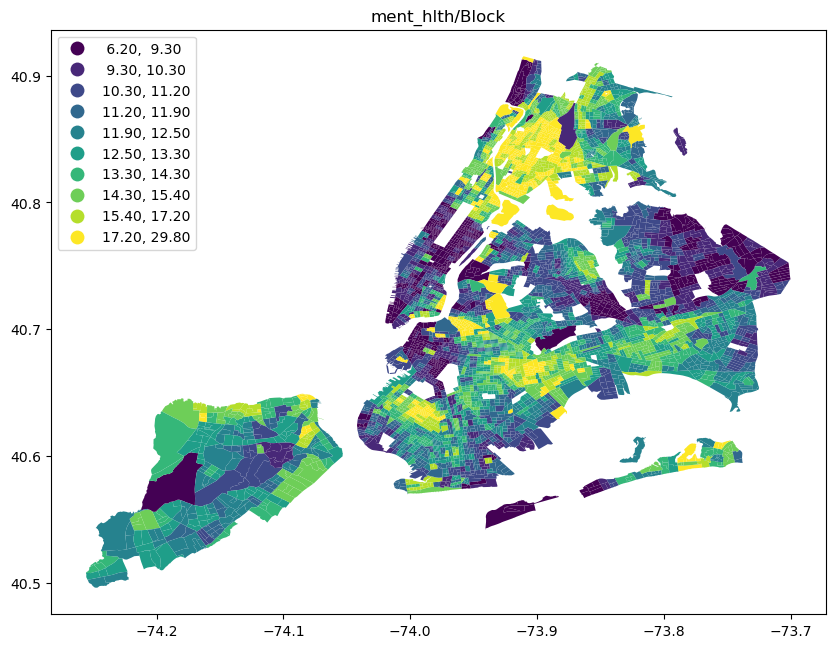

In [7]:
plot_gdf(gdf_mental, 'ment_hlth', quantiles=True)

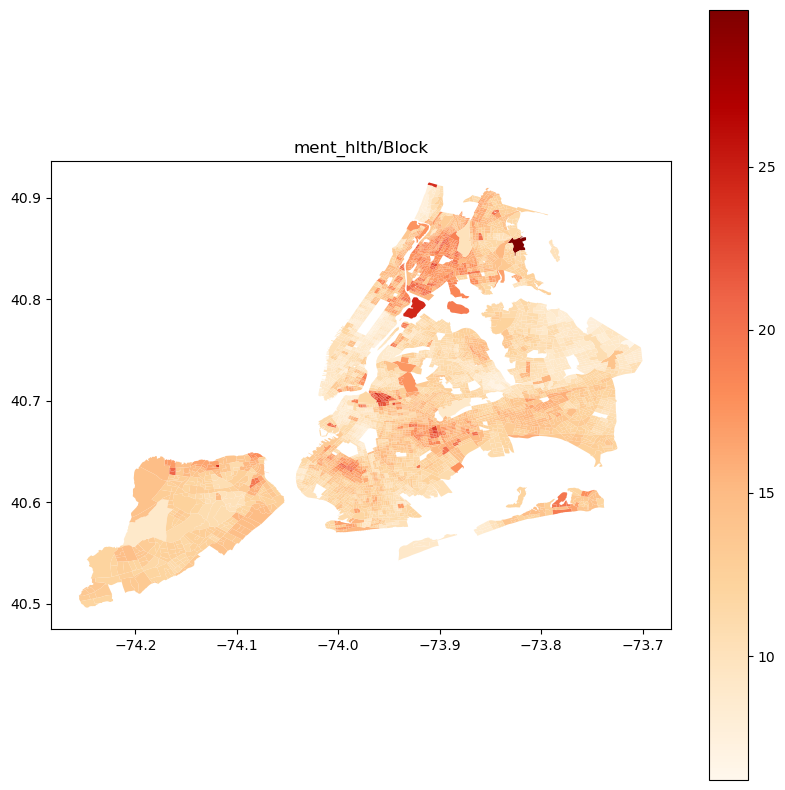

In [8]:
plot_gdf(gdf_mental, 'ment_hlth', cmap='OrRd')

In [9]:
gdf_physical = analysis_feature('phys_hlth', df)

In [10]:
gdf_physical['phys_hlth'].describe()

count    6212.000000
mean       12.114874
std         3.604966
min         4.000000
25%         9.800000
50%        11.800000
75%        14.100000
max        41.000000
Name: phys_hlth, dtype: float64

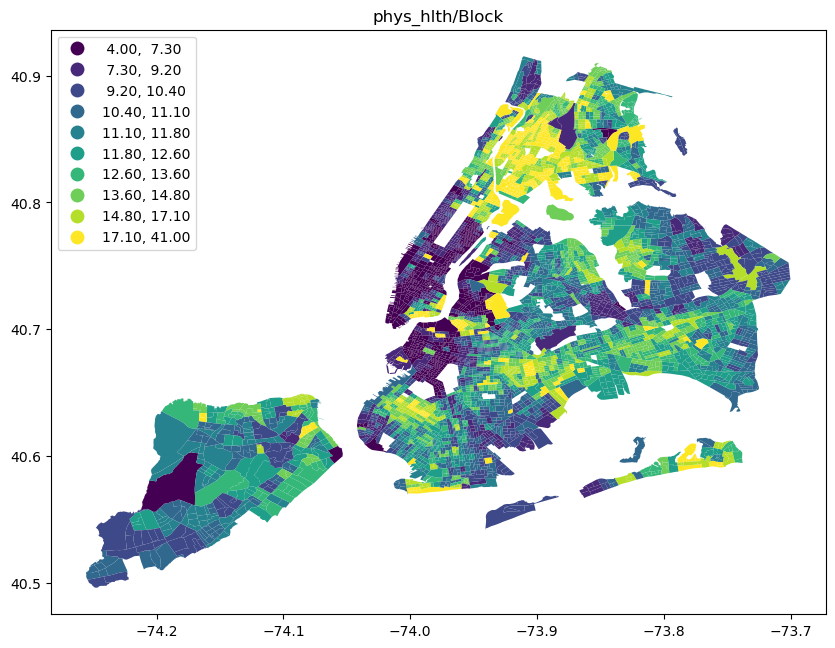

In [11]:
plot_gdf(gdf_physical, 'phys_hlth', quantiles=True)

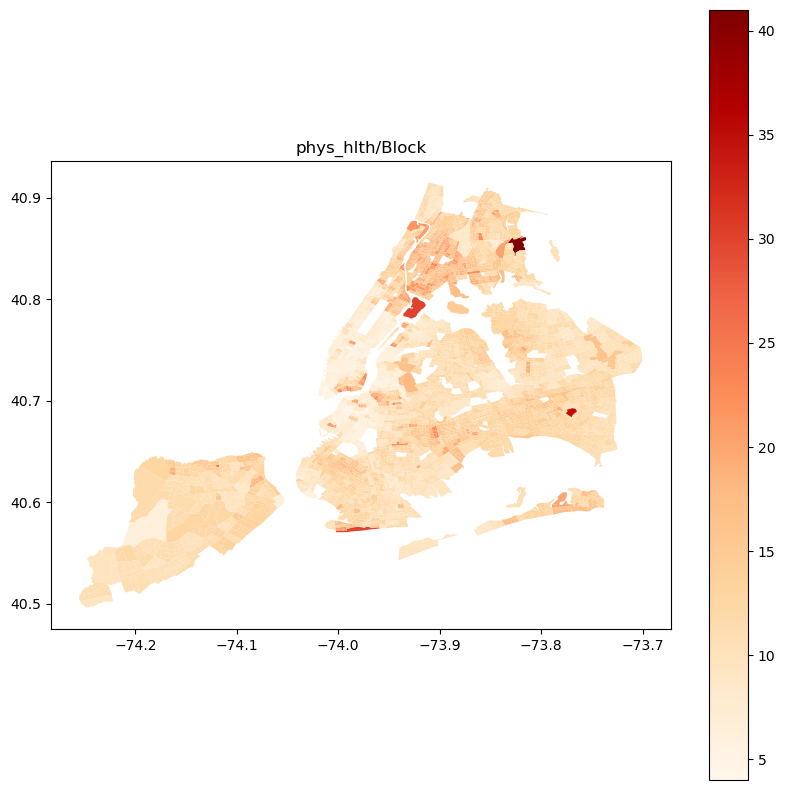

In [12]:
plot_gdf(gdf_physical, 'phys_hlth', cmap='OrRd')

#### def了方法分析data中的任一特征，如上
#### 可以看到physical和mental有一定相关性